<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#&quot;Implémentez-un-modèle-de-scoring&quot;" data-toc-modified-id="&quot;Implémentez-un-modèle-de-scoring&quot;-1">"Implémentez un modèle de scoring"</a></span><ul class="toc-item"><li><span><a href="#0-Preliminaries" data-toc-modified-id="0-Preliminaries-1.1">0 Preliminaries</a></span><ul class="toc-item"><li><span><a href="#0.0-Importing-Packages-and-Modules" data-toc-modified-id="0.0-Importing-Packages-and-Modules-1.1.1">0.0 Importing Packages and Modules</a></span></li><li><span><a href="#0.1-Importing-data-and-model" data-toc-modified-id="0.1-Importing-data-and-model-1.1.2">0.1 Importing data and model</a></span></li></ul></li><li><span><a href="#1-Customer's-choice" data-toc-modified-id="1-Customer's-choice-1.2">1 Customer's choice</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Encoding" data-toc-modified-id="Encoding-1.2.0.1">Encoding</a></span></li><li><span><a href="#Nearest-Neighbors" data-toc-modified-id="Nearest-Neighbors-1.2.0.2">Nearest Neighbors</a></span></li></ul></li><li><span><a href="#2.4-Data-Visualization-after-preprocessing-(2D-projection)" data-toc-modified-id="2.4-Data-Visualization-after-preprocessing-(2D-projection)-1.2.1">2.4 Data Visualization after preprocessing (2D projection)</a></span></li></ul></li><li><span><a href="#3-SHAP-values" data-toc-modified-id="3-SHAP-values-1.3">3 SHAP values</a></span></li></ul></li></ul></div>

# "Implémentez un modèle de scoring"
_Building and optimizing a classification model_

References used for this notebook:


## 0 Preliminaries

### 0.0 Importing Packages and Modules

In [7]:
import io
import random
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor']='w'

In [5]:
from P7_functions import *

In [8]:
dictPdSettings = {'display.max_rows': 500, 'display.width': 100,
                  'display.max_colwidth': 100,
                  'display.float_format': lambda x: '%.2f' % x}
for k,v in dictPdSettings.items():
  pd.set_option(k,v)

### 0.1 Importing data and model

In [11]:
# import cleaned data and model

import dill

with open('..\\PICKLES\\dict_cleaned.pkl', 'rb') as file:
    dict_cleaned = dill.load(file)
with open('..\\PICKLES\\best_pipe.pkl', 'rb') as file:
    best_model = dill.load(file)

In [12]:
X_train = dict_cleaned['X_train']
y_train = dict_cleaned['y_train']
X_test = dict_cleaned['X_test']

## 1 Customer's choice

#### Encoding

In [24]:
best_model.named_steps['preproc']

CustTransformer(strat_high_card='loo', thresh_card=8)

In [28]:
from sklearn.neighbors import NearestNeighbors

preprocess = best_model.named_steps['preproc']
preprocess.fit(X_train)
X_train_enc = preprocess.transform(X_train)
X_test_enc = preprocess.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\ProgramData\Anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [35]:
X_cust = X_test_enc.sample(1)
X_cust

,binary__CNT_FAM_MEMBERS_NOT_CHILD,binary__NAME_CONTRACT_TYPE,binary__CODE_GENDER,binary__FLAG_OWN_CAR,binary__FLAG_OWN_REALTY,binary__REG_REGION_NOT_LIVE_REGION,binary__LIVE_REGION_NOT_WORK_REGION,binary__REG_CITY_NOT_LIVE_CITY,binary__LIVE_CITY_NOT_WORK_CITY,binary__FLAG_DOCUMENT_2,...,AMT_ANNUITY,EXT_SOURCE_2,EXT_SOURCE_3,PA_DAYS_TOT_DURATION__mean,PA_DAYS_TOT_DURATION__sum,PA_AMT_ANNUITY__mean,PA_CNT_PAYMENT__mean,PA_AMT_CREDIT__sum,PA_AMT_CREDIT__mean,PA_PrL_N_CONT_Ty_Revolving loans__sum
11569,2.00,1.00,2.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,...,-0.97,0.86,0.11,-0.62,-0.70,-0.51,0.05,0.02,-0.21,2.57


#### Nearest Neighbors

In [ ]:
### A IMPORTER

neigh = NearestNeighbors(n_neighbors=20)
neigh.fit(X_train_enc)

In [39]:
nearest_cust_idx = neigh.kneighbors(X=X_cust, n_neighbors=20, return_distance=False)

### 2.4 Data Visualization after preprocessing (2D projection)

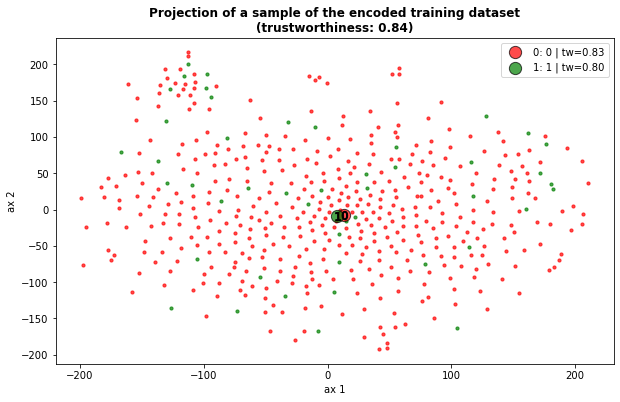

In [42]:
# Projection of a sample of the training set, colored with target value

ind_samp = X_train_enc.sample(500).index

plot_projection(X=X_train_enc.loc[ind_samp],
                y=y_train.loc[ind_samp],
                model=None,
                highlight_ind =   # indices of points to include and highlight
                ser_clust = y_train.loc[ind_samp],
                proj='t-SNE', # PCA, UMAP, t-SNE
                tw_n_neigh=5, title="Projection of a sample of the encoded training dataset",
                bboxtoanchor=None, figsize=(10, 6), size=10, palette=['r','g'], # 'tab10'
                legend_on=False, fig=None, ax=None, random_state=14)

In [ ]:
import seaborn as sns

def plot_projection(X, y, model=None, ser_clust = None, proj='PCA',
                    tw_n_neigh=5, title=None, bboxtoanchor=None,
                    figsize=(5, 3), size=1, palette='tab10',
                    legend_on=False, fig=None, ax=None, random_state=14):

    fig = plt.figure(figsize=figsize) if fig is None else fig
    ax = fig.add_subplot(111) if ax is None else ax

    # a1 - if model : computes clusters, clusters centers and plot with colors
    if model is not None:

        # Computes the axes for projection with centers
        # (uses fitted model if already fitted)
        dict_proj, dict_proj_centers, model = prepare_2D_axes(X, y,
                                                              proj=[proj],
                                                              model=model,
                                                              centers_on=True,
                                                              random_state=random_state)

        # ...or using model already fitted in prepare_2D_axes to get it
        #### all clusterers don't have .predict/labels_ method -> changed
        if hasattr(model, 'labels_'):
            clust = model.labels_
        else:
            clust = model.predict(X)
        ser_clust = pd.Series(clust,
                                index=X.index,
                                name='Clust')
        
    # a2 - if no model but ser_clust is given, plot with colors
    elif ser_clust is not None:
        
        # Computes the axes for projection
        dict_proj, dict_proj_centers, _ = \
            prepare_2D_axes(X, y, ser_clust=ser_clust, proj=[proj],
                            model=None, centers_on=True,
                            random_state=random_state)

        n_clust = ser_clust.nunique()
        colors = sns.color_palette(palette, n_clust).as_hex()

    # Computing the global trustworthiness
    trustw = trustworthiness(X, dict_proj[proj],
                            n_neighbors=tw_n_neigh, metric='euclidean')
    # Computing the trustworthiness category by category
    ser_tw_clust = groups_trustworthiness(X, dict_proj[proj], ser_clust,
                                          n_neighbors=tw_n_neigh)

    # b1 - if ser_clust exists (either calculated from model or given)
    if ser_clust is not None:

        # Showing the points, cluster by cluster
        # for i in range(n_clust):
        for i, name_clust in enumerate(ser_clust.unique()):
            ind = ser_clust[ser_clust == name_clust].index
            ax.scatter(dict_proj[proj].loc[ind].iloc[:, 0],
                       dict_proj[proj].loc[ind].iloc[:, 1],
                       s=size, alpha=0.7, c=colors[i], zorder=1)

            # Showing the clusters centers
            ax.scatter(dict_proj_centers[proj].iloc[:, 0].loc[name_clust],
                        dict_proj_centers[proj].iloc[:, 1].loc[name_clust],
                        marker='o', c=colors[i], alpha=0.7, s=150,
                       edgecolor='k',
                       label="{}: {} | tw={:0.2f}".format(i, name_clust,
                                                          ser_tw_clust[name_clust]),
                       zorder=10) # for the labels only
            # Showing the clusters centers labels (number)
            ax.scatter(dict_proj_centers[proj].iloc[:, 0].loc[name_clust],
                        dict_proj_centers[proj].iloc[:, 1].loc[name_clust],
                        marker=r"$ {} $".format(i),#
                        c='k', alpha=1, s=70, zorder=100)
            if legend_on:
                plt.legend().get_frame().set_alpha(0.3)
            if bboxtoanchor is not None:
                plt.legend(bbox_to_anchor=bboxtoanchor)
            else: 
                plt.legend()


    # b2 - if no ser_clust: only plot points in grey
    else:
        # Computes the axes for projection without centers
        dict_proj = prepare_2D_axes(X, y,
                                    proj=[proj],
                                    centers_on=False,
                                    random_state=random_state)
        # Plotting the point in grey
        ax.scatter(dict_proj[proj].iloc[:, 0],
                   dict_proj[proj].iloc[:, 1],
                   s=size, alpha=0.7, c='grey')

    title = "Projection: " + proj + "(trustworthiness: {:.2f})".format(trustw)\
             if title is None else title
    ax.set_title(title + "\n(trustworthiness: {:.2f})".format(trustw),
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('ax 1'), ax.set_ylabel('ax 2')

## 3 SHAP values

In [71]:
import se<aborn as sns
from lightgbm import LGBMClassifier

In [63]:
df_iris = sns.load_dataset('iris')
df_iris.head()

In [65]:
X = df_iris.iloc[:,:-1]
y = df_iris.iloc[:,-1]

In [72]:
lgbm = LGBMClassifier()
lgbm.fit(X, y)

In [91]:
N = 50
my_X = df_iris.iloc[N:N+1,:-1]
lgbm.predict_proba(my_X), df_iris.iloc[N,-1]

(array([[4.28717368e-06, 9.99982856e-01, 1.28568726e-05]]), 'versicolor')

In [93]:
import shap

# build an Exact explainer and explain the model predictions on the given dataset
explainer = shap.explainers.Exact(lgbm.predict_proba, X)

In [117]:
shap_values = explainer(X.iloc[:100])
# get just the explanations for the positive class
shap_values = shap_values[...,1]

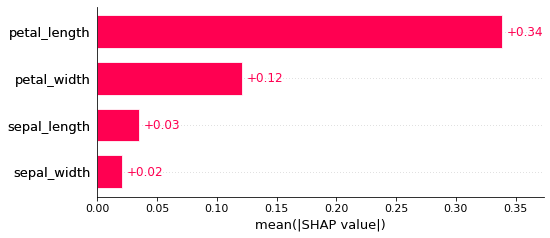

In [118]:
shap.plots.bar(shap_values)

In [56]:
import shap

# build an Exact explainer and explain the model predictions on the given dataset
explainer = shap.explainers.Exact(best_model.predict_proba, X_train)

In [57]:
shap_values = explainer(X_train.iloc[:100].values)

# get just the explanations for the positive class
# shap_values = shap_values[...,1]

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

TypeError: only integer scalar arrays can be converted to a scalar index